In [1]:
%matplotlib inline
%run ../../path_import.py
from plots import *
from training import *
from eubo import *
from model_naive_natparam import *

import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
data_path = "../gmm_dataset_conjugate2k"
Data = torch.from_numpy(np.load(data_path + '/obs.npy')).float()
_, N, D = Data.shape
K = 3 ## number of clusters
## Model Parameters
MCMC_SIZE = 10
SAMPLE_SIZE = 10
NUM_HIDDEN_LOCAL = 64
## Training Parameters
BATCH_SIZE = 20
NUM_EPOCHS = 2000
LEARNING_RATE = 1e-4
CUDA = torch.cuda.is_available()
PATH = 'ag-idw-init-z-kl_v2'

DEVICE = torch.device('cuda:0')

In [3]:
enc_eta, enc_z, optimizer = initialize(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE, LEARNING_RATE)

In [4]:
train(Eubo_idw_init_z, enc_eta, enc_z, optimizer, Data, K, NUM_EPOCHS, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE, PATH, CUDA, DEVICE)

epoch=0, EUBO=-699.168, ELBO=-1093.916, ESS=3.022 (11s)
epoch=1, EUBO=-685.174, ELBO=-1059.628, ESS=3.076 (12s)
epoch=2, EUBO=-670.594, ELBO=-1029.144, ESS=3.135 (12s)
epoch=3, EUBO=-654.231, ELBO=-993.904, ESS=3.194 (12s)
epoch=4, EUBO=-640.509, ELBO=-964.402, ESS=3.255 (12s)
epoch=5, EUBO=-629.102, ELBO=-938.726, ESS=3.320 (12s)
epoch=6, EUBO=-612.576, ELBO=-910.066, ESS=3.381 (12s)
epoch=7, EUBO=-606.660, ELBO=-889.431, ESS=3.452 (11s)
epoch=8, EUBO=-595.389, ELBO=-864.394, ESS=3.518 (10s)
epoch=9, EUBO=-583.956, ELBO=-842.384, ESS=3.590 (10s)
epoch=10, EUBO=-574.299, ELBO=-819.972, ESS=3.654 (10s)
epoch=11, EUBO=-569.512, ELBO=-804.168, ESS=3.726 (10s)
epoch=12, EUBO=-560.405, ELBO=-784.688, ESS=3.797 (11s)
epoch=13, EUBO=-552.687, ELBO=-767.576, ESS=3.864 (14s)
epoch=14, EUBO=-546.382, ELBO=-755.302, ESS=3.928 (14s)
epoch=15, EUBO=-539.410, ELBO=-737.858, ESS=3.987 (11s)
epoch=16, EUBO=-534.851, ELBO=-724.799, ESS=4.047 (12s)
epoch=17, EUBO=-527.255, ELBO=-712.102, ESS=4.100 (13s)

In [5]:
torch.save(enc_eta.state_dict(), '../weights/enc-eta-%s' + PATH)
torch.save(enc_z.state_dict(), '../weights/enc-z-%s' + PATH)

In [6]:
BATCH_SIZE_TEST = 50
obs, q_eta, q_z = test(Eubo_idw_init_eta, enc_eta, enc_z, Data, K, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE_TEST, CUDA, DEVICE)

CPU times: user 3.77 s, sys: 32 ms, total: 3.81 s
Wall time: 3.85 s


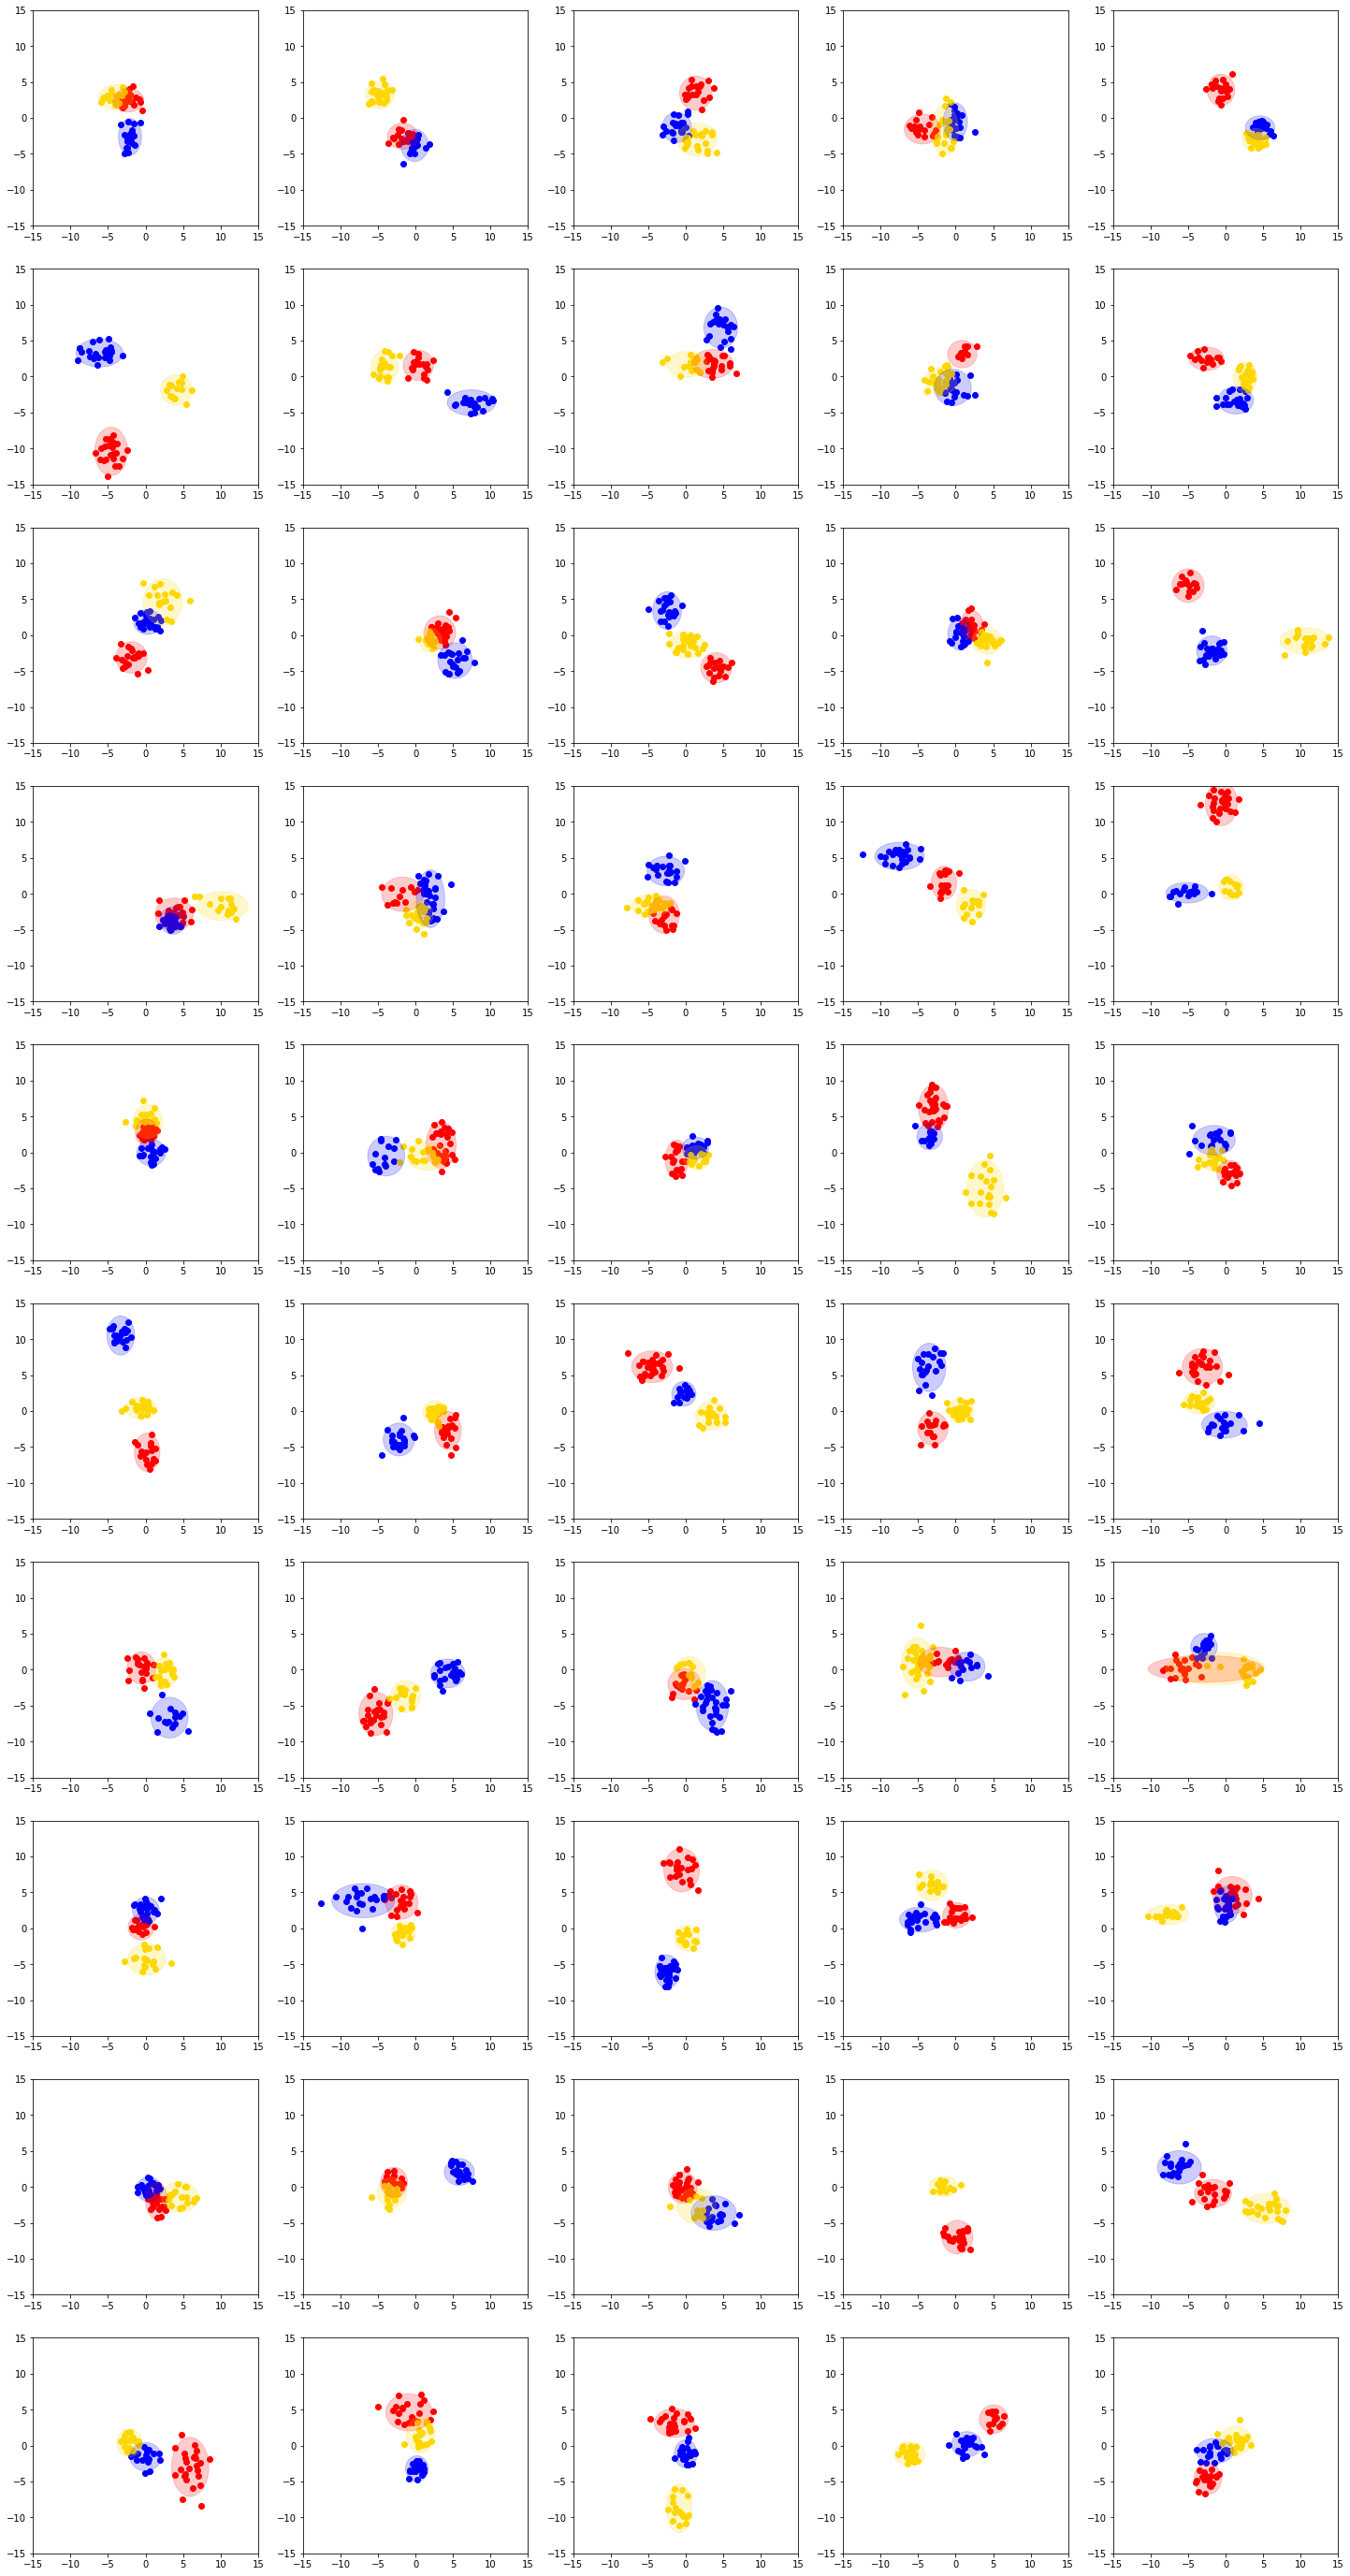

In [7]:
%time plot_samples(obs, q_eta, q_z, PATH)